In [ ]:
# dataset properties
import pandas as pd

## Importing the dataset including alay and stopwords dictionaries

In [ ]:
url = "https://raw.githubusercontent.com/fwznbg/gemas/main/Indo_hatespeech/data.csv?token=ANRCLKFAQ5DRER3W3LNXNGTBKAOOW"

# the actual dataset
df = pd.read_csv(url, encoding='latin-1')

#take only the HS label
df_HS = df[['Tweet','HS']]

# alay dictionary
alay_dict = pd.read_csv("https://raw.githubusercontent.com/fwznbg/gemas/main/Indo_hatespeech/new_kamusalay.csv?token=ANRCLKF3Z52ZBZN5GQ4GSR3BKAPLI", encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0: 'original',1: 'replacement'})

# stopwords
id_stopword_dict = pd.read_csv('https://raw.githubusercontent.com/fwznbg/gemas/main/indo_stopwords/stopwordbahasa.csv?token=ANRCLKG42WW4R4FDRQ7CIMLBKAP4G', header=None)
id_stopword_dict = id_stopword_dict.rename(columns={0: 'stopword'})

HTTPError: ignored

In [ ]:
df_HS.head()

,Tweet,HS
0,cowok usaha lacak perhati gue lantas remeh per...,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0
3,ku tau mata sipit lihat,0
4,kaum cebong kafir lihat dongok dungu haha,1


## Preprocessing

sumber = https://www.kaggle.com/ilhamfp31/preprocessing-the-indonesian-hate-abusive-text/notebook

In [ ]:
# imports
import re

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

     |████████████████████████████████| 209 kB 4.1 MB/s 


In [ ]:
# object creation
factory = StemmerFactory()
stemmer = factory.create_stemmer()

### Preprocess functions

In [ ]:
def lowercase(text):
    return text.lower()

# UNDERSTAND THE CONTEXT OF THE DATA, BELOW IS ALR CATERED TO THE NEED OF THIS SPECIFIC DATASET.
# I REPEAT, UNDERSTAND THE CONTEXT OF THE DATA
def remove_unnecessary_char(text):
    text = re.sub('\n',' ',text) # Remove every '\n'
    text = re.sub('rt',' ',text) # Remove every retweet symbol
    text = re.sub('user',' ',text) # Remove every username
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text) # Remove every URL
    text = re.sub('  +', ' ', text) # Remove extra spaces
    return text
    
def remove_nonaplhanumeric(text):
    text = re.sub('[^a-zA-Z]+', ' ', text) 
    return text

#CREATE THE DICTIONARY
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))
def normalize_alay(text):
    return ' '.join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split(' ')])

def remove_stopword(text):
    text = ' '.join(['' if word in id_stopword_dict.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Remove extra spaces
    text = text.strip()
    return text

def stemming(text):
    return stemmer.stem(text)

NameError: ignored

In [ ]:
# aggregate preprocess function
# ADJUST THE ORDER/FUNCTIONS IF NECESSARY
def preprocess(text):
  text = lowercase(text) # 1
  text = remove_nonaplhanumeric(text) # 2
  text = remove_unnecessary_char(text) # 2
  text = normalize_alay(text) # 3
  text = stemming(text) # 4
  # text = remove_stopword(text) # 5
  return text

In [ ]:
# run the preproccessing part
df_HS["Tweet"] = df_HS["Tweet"].apply(preprocess)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# FUNCTION TO KNOW HOW LONG EACH SENTENCE IS
def howlong(text):
  return len(text.split())

# langsung run saja gan
df_HS['n_words'] = df_HS['Tweet'].apply(howlong)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# uncomment if want to download to csv
# df_HS.to_csv("dfHatespeechPreprocessed.csv")

## Pre-preprocessed data, so you don't have to run the 2 above

In [ ]:
import re

In [ ]:
url = "https://raw.githubusercontent.com/fwznbg/gemas/main/Indo_hatespeech/dfHatespeechPreprocessed.csv?token=ANRCLKB2BW2ICUPCC44GGEDBKKQSS"
df_HS = pd.read_csv(url)
df_HS = df_HS.loc[:, ~df_HS.columns.str.contains('^Unnamed')]
df_HS['Tweet'] = df_HS['Tweet'].astype('str')
df_HS = df_HS.drop_duplicates(subset='Tweet', keep="first")

In [ ]:
# delete string "uniform resource locator"
def stringDeletor(text):
    text = text.replace("uniform resource locator","")
    return text

df_HS['Tweet'] = df_HS['Tweet'].apply(stringDeletor)

In [ ]:
df_HS.head()

,Tweet,HS
0,cowok usaha lacak perhati gue lantas remeh per...,1
1,telat tau edan sarap gue gaul cigax jifla cal ...,0
2,41 kadang pikir percaya tuhan jatuh kali kali ...,0
3,ku tau mata sipit lihat,0
4,kaum cebong kafir lihat dongok dungu haha,1


In [ ]:
df_HS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12719 entries, 0 to 13168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   12719 non-null  object
 1   HS      12719 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 298.1+ KB


## Neural Network

In [ ]:
# imports
# btw ternyata si preprocesser di atas ga ngilangin angka

from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences

### Train Test Val Split

In [ ]:
# imports

# train test split
from sklearn.model_selection import train_test_split

In [ ]:
# split train and test first, only tokenize from the train test
X = df_HS['Tweet']
y = df_HS['HS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
# processing the labels
# ikut cara yg di sini https://www.kaggle.com/kredy10/simple-lstm-for-text-classification
le = LabelEncoder()

#train
y_train = le.fit_transform(y_train)
y_train = y_train.reshape(-1,1)

#test
y_test = le.fit_transform(y_test)
y_test = y_test.reshape(-1,1)

### Tokenizer

In [ ]:
# USED CONSTANTS
MAX_WORDS = 5000 #berapa banyak yg diketahui sama si tokenizer
MAX_ENTRY_LEN = 150 #tiap entry berapa banyak, feeling aja sih dari statistik panjang di atas

In [ ]:
# CREATE TOKENIZER OBJECTS
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='OOV')
tokenizer.fit_on_texts(X_train)

#printing properties, print word_index if you want lol
word_index = tokenizer.word_index

In [ ]:
# xfo, x9f, x98 apaan bjir tapi ga ngaruh ga si? oh emoji, gaapa sih menunjukkan sentimen juga
print(word_index)

{'OOV': 1, 'xf0': 2, 'x9f': 3, 'x98': 4, 'indonesia': 5, 'orang': 6, 'presiden': 7, 'gue': 8, 'ya': 9, 'jokowi': 10, 'islam': 11, 'sih': 12, 'agama': 13, 'pilih': 14, 'asing': 15, 'rakyat': 16, 'komunis': 17, 'x82': 18, 'xe2': 19, 'x80': 20, 'kerja': 21, 'cina': 22, 'nya': 23, '2019': 24, 'ganti': 25, 'kayak': 26, 'negara': 27, 'cebong': 28, 'partai': 29, 'daerah': 30, 'i': 31, 'lihat': 32, 'a': 33, 'banget': 34, 'nih': 35, 'kepala': 36, 'gubernur': 37, 'pakai': 38, 'wakil': 39, 'kristen': 40, 'kafir': 41, 'salah': 42, 'anak': 43, 'tau': 44, 'ahok': 45, 'wkwk': 46, 'rezim': 47, 'iya': 48, 'ekonomi': 49, 'perintah': 50, 'ulama': 51, 'amp': 52, 'dukung': 53, 'allah': 54, 'bilang': 55, 'budaya': 56, 'prabowo': 57, 'suka': 58, 'haha': 59, 'antek': 60, 'dasar': 61, '2': 62, 'hati': 63, '1': 64, 'anjing': 65, 'muslim': 66, 'nyata': 67, 'calon': 68, 'xa6': 69, 'sepe': 70, 'ajar': 71, 'biar': 72, 'bicara': 73, 'tai': 74, 'kasih': 75, 'nama': 76, 'laku': 77, 'undang': 78, '2018': 79, 'jawa': 80

In [ ]:
# making the padded sequences
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=MAX_ENTRY_LEN)

### Creating the actual neural network layers

In [ ]:
# imports
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [ ]:
# making the model
EMBEDDING_DIM = 100 #still ga ngerti ini apa

model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=sequences_matrix.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

opt = RMSprop(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# TODO, belajar soal
# - loss yang baik buat NLP apa
# - optimizer
# - keliatannya metric yang paling bagus buat ini F1?
# - cara make validation set gimana ajg

In [ ]:
sequences_matrix

array([[   0,    0,    0, ..., 2344,   80,  136],
       [   0,    0,    0, ...,  308, 2029, 3791],
       [   0,    0,    0, ...,  165,  713,  156],
       ...,
       [   0,    0,    0, ..., 2125,  154,  232],
       [   0,    0,    0, ...,   25,  923, 3736],
       [   0,    0,    0, ...,    1,    1,    1]], dtype=int32)

In [ ]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# running the model
# eh keliatannya ini udah make validation split deh?????????? jadi di atas gausa dibagi jaadi validation harusnya?
history = model.fit(sequences_matrix, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
72/72 [==============================] - 47s 650ms/step - loss: 0.5336 - accuracy: 0.7668 - val_loss: 0.5297 - val_accuracy: 0.7642
Epoch 2/10
72/72 [==============================] - 47s 651ms/step - loss: 0.4922 - accuracy: 0.7919 - val_loss: 0.4963 - val_accuracy: 0.7819
Epoch 3/10
72/72 [==============================] - 47s 649ms/step - loss: 0.4598 - accuracy: 0.8034 - val_loss: 0.4731 - val_accuracy: 0.7898
Epoch 4/10
72/72 [==============================] - 47s 648ms/step - loss: 0.4304 - accuracy: 0.8134 - val_loss: 0.4530 - val_accuracy: 0.7967
Epoch 5/10
72/72 [==============================] - 47s 649ms/step - loss: 0.4098 - accuracy: 0.8225 - val_loss: 0.4393 - val_accuracy: 0.8016
Epoch 6/10
72/72 [==============================] - 47s 649ms/step - loss: 0.3872 - accuracy: 0.8315 - val_loss: 0.4300 - val_accuracy: 0.8055
Epoch 7/10
72/72 [==============================] - 47s 648ms/step - loss: 0.3705 - accuracy: 0.8411 - val_loss: 0.4253 - val_accuracy: 0.8075

## Test Set

In [ ]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=MAX_ENTRY_LEN)

In [ ]:
accr = model.evaluate(test_sequences_matrix,y_test)

80/80 [==============================] - 3s 42ms/step - loss: 0.3989 - accuracy: 0.8259


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))


Test set
  Loss: 0.399
  Accuracy: 0.826


### hasilkan hasil

In [ ]:
import numpy as np

In [ ]:
hasil = model.predict(test_sequences_matrix)
hasilrounded = np.round(hasil).astype(int)

In [ ]:
hasilrounded

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, hasilrounded))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1480
           1       0.77      0.83      0.80      1064

    accuracy                           0.83      2544
   macro avg       0.82      0.83      0.82      2544
weighted avg       0.83      0.83      0.83      2544



### gabungkan gabung

In [ ]:
len(hasilrounded)

2634

In [ ]:
final = pd.DataFrame(X_test)

In [ ]:
final['hasil'] = hasilrounded

In [ ]:
final[:1000]

,Tweet,hasil
13063,katolik di jawa ini untuk doa yang tinggal ada...,0
1383,ingin aduk aduk jawa tengah kayak daerah khusu...,0
580,bang laku itu dia tetap kristen istri tetap mu...,0
242,sudah buka satu demi satu busuk kubu anies san...,1
6416,ya kali ada mana daerah mana transmigran dari ...,0
...,...,...
3796,cebong sana sini cari simpatisan dan popularitas,1
10803,cuma mau ingat saja agar hati hati dalam sosia...,0
2094,teriak teriak partai komunis indonesia ganyang...,1
1078,apa apa bapak sih kakak cocot sitohang,0


In [ ]:
final.to_csv("hasil2.csv")

### graphing

In [ ]:
# imports
import matplotlib.pyplot as plt

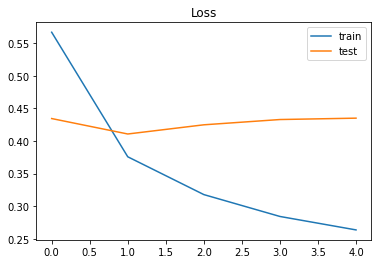

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

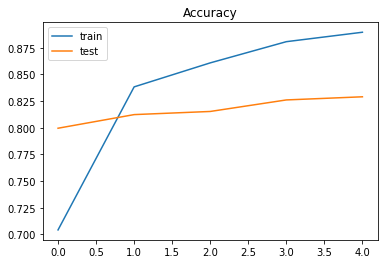

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();